In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install keras

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler,scale
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
forest = pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
forest.drop(["month","day"],axis=1,inplace=True)

In [7]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forest.loc[forest['size_category']=='small','category']=0
forest.loc[forest['size_category']=='large','category']=1

In [24]:
X = forest.iloc[:,:28]
Y = forest['category']

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.20,random_state=16)

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X, Y,validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 12.7507 - accuracy: 0.9133 - val_loss: 1.2444 - val_accuracy: 0.9357
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.9798 - val_loss: 0.8213 - val_accuracy: 0.9532
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.9798 - val_loss: 2.8251 - val_accuracy: 0.9357
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.9325 - accuracy: 0.9798 - val_loss: 1.0685 - val_accuracy: 0.9532
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 1.4825 - accuracy: 0.9711 - val_loss: 1.6921 - val_accuracy: 0.9415
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 1.1654 - accuracy: 0.9798 - val_loss: 1.5095 - val_accuracy: 0.9415
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8239 - accuracy: 0.9855 - val_loss: 0.7629 - val_accuracy: 0.9415
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.9884 - val_loss: 0.3699 - val_accuracy: 0.9708
Epoch 60/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9884 - val_loss: 1.3749 - val_accuracy: 0.9591
Epoch 61/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0931 - accuracy: 0.9913 - val_loss: 0.3677 - val_accuracy: 0.9708
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9942 - val_loss: 0.4570 - val_accuracy: 0.9591
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9913 - val_loss: 0.2138 - val_accuracy: 0.9825
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9913 - val_loss: 0.2165 - val_accuracy: 0.9766
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9913 - val_loss: 0.2134 - val_accuracy: 0.9766
Epoch 

In [27]:
scores = model.evaluate(X,Y)
print((model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9903
('accuracy', 99.0328848361969)


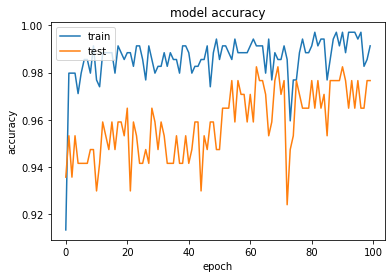

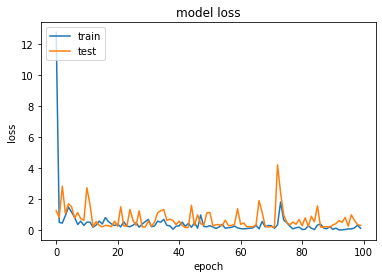

In [28]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()